#本数据集，是王者荣耀所有英雄的相关属性数据（大概是2018年版本），我们的可视化就是想要得出一些有趣的结论

#1.先总览数据集

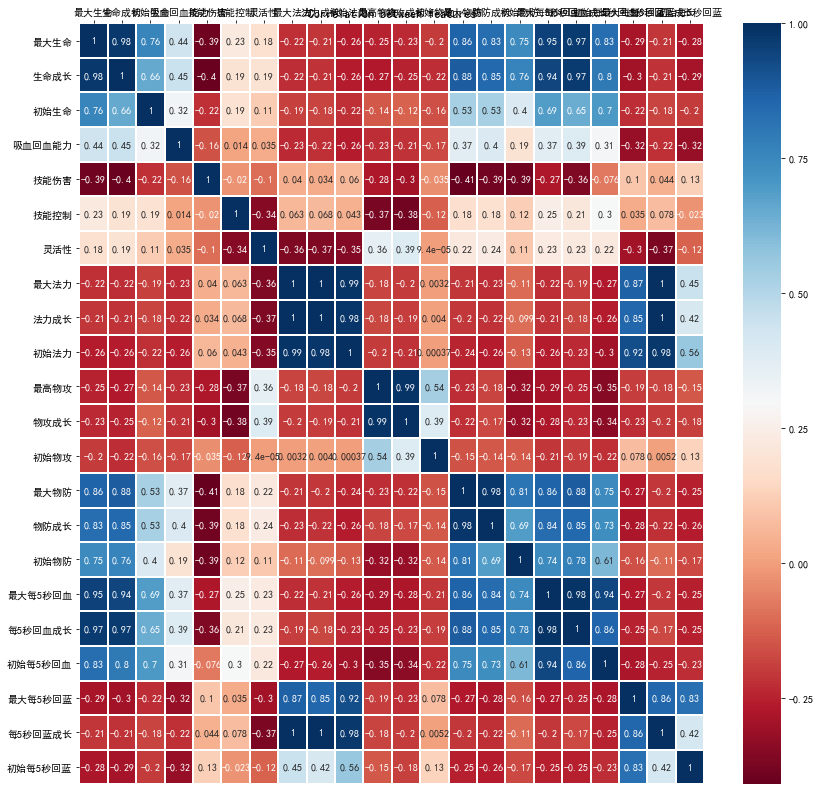

In [19]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding = 'gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'吸血回血能力',u'最大攻速',u'技能伤害',u'技能控制',u'灵活性',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]



# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
#plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
#sns.heatmap(corr, annot=True)

plt.show()


f, ax= plt.subplots(figsize = (14, 14))

sns.heatmap(corr,cmap='RdBu', linewidths = 1, ax = ax, annot=True)

#X轴向上
ax.xaxis.tick_top()

# 设置Axes的标题
ax.set_title('Correlation between features')

f.savefig('feature_relationship_1.jpg', dpi=100, bbox_inches='tight')
 


#2.调整数据排列（以突出相关性）

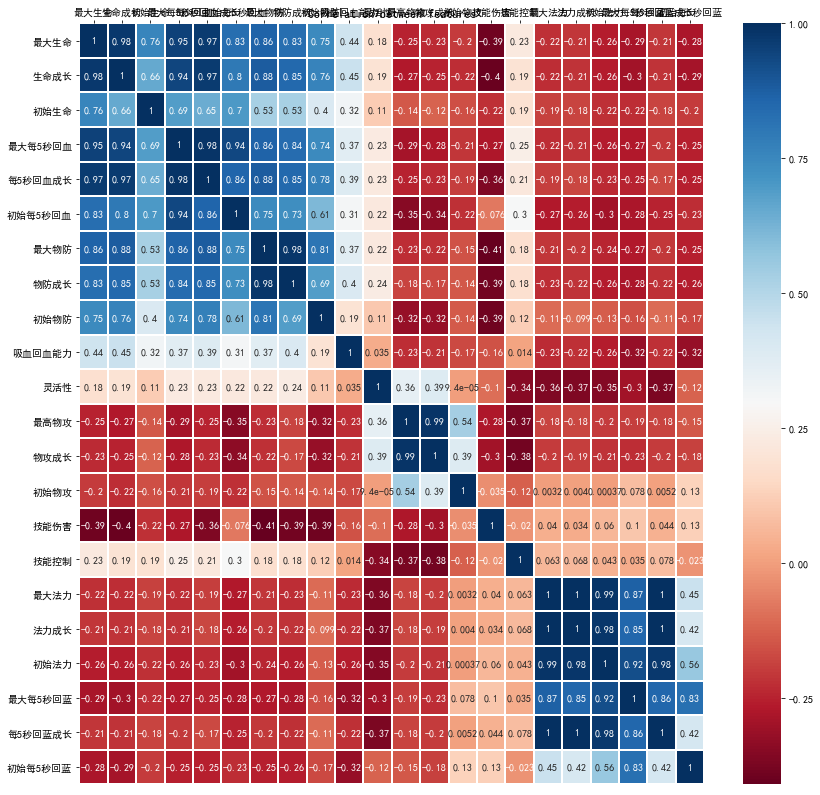

In [20]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding = 'gb18030')
features = [u'最大生命',u'生命成长',u'初始生命', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血',u'最大攻速', u'最大物防',u'物防成长',u'初始物防',u'吸血回血能力',u'灵活性',u'最高物攻',u'物攻成长',u'初始物攻',u'技能伤害',u'技能控制',u'最大法力', u'法力成长',u'初始法力',u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
#features = [u'最大生命',u'最大物防',u'最高物攻',u'最大法力',u'最大攻速', u'攻击范围',u'技能伤害',u'技能控制',u'灵活性',u'吸血回血能力']
data = data_ori[features]

#data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
#data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
#plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
#sns.heatmap(corr, annot=True)

plt.show()


f, ax= plt.subplots(figsize = (14, 14))

sns.heatmap(corr,cmap='RdBu', linecolor='white',linewidths = 1, ax = ax,annot=True)

#X轴向上
ax.xaxis.tick_top()

# 设置Axes的标题
ax.set_title('Correlation between features')

f.savefig('feature_relationship_2.jpg', dpi=100, bbox_inches='tight')
 


由上面的矩阵，我们可以得出以下结论：

①最大生命值和物理防御紧密相关，但是与伤害值成明显负相关。

②法力值与技能伤害值成正相关，这与大部分法师伤害爆炸有关系。

③灵活性与防御能力成轻微的正相关，与伤害成负相关，那么也就是说，大部分的高伤害英雄，其实没什么灵活性

#3.对所有英雄进行聚类（用GMM算法聚类）

In [18]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding = 'gb18030')
# 相关性大的属性保留一个，因此可以对属性进行降维
#features_remain = [u'最大生命',u'生命成长',u'初始生命', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血',u'最大攻速', u'最大物防',u'物防成长',u'初始物防',u'吸血回血能力',u'灵活性',u'最高物攻',u'物攻成长',u'初始物攻',u'技能伤害',u'技能控制',u'最大法力', u'法力成长',u'初始法力',u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']

features_remain = [u'灵活性',u'技能控制',u'技能伤害',u'最大生命', u'最高物攻', u'最大物防',u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=10, covariance_type='full')
gmm.fit(data)
# 训练数据
prediction = gmm.predict(data)
print(prediction)
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out_3.csv', index=False, sep=',',encoding = 'gb18030')

from sklearn.metrics import calinski_harabaz_score
print(calinski_harabaz_score(data, prediction))

[5 3 7 7 1 1 2 7 7 3 7 3 7 6 5 7 5 7 1 0 8 0 8 0 0 0 0 0 2 2 1 9 2 2 9 9 2
 1 1 4 2 2 9 9 2 2 3 3 3 4 1 1 1 8 8 6 5 1 8 1 5 1 5 1 8 1 1 1 8]
19.014076948353118


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#4.我们来看一下聚类的结果

In [6]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler



data_ori = pd.read_csv('./hero_out_3.csv', encoding = 'gb18030')
features = ['英雄','分组']
data = data_ori[features]

list_0=list()
list_1=list()
list_2=list()
list_3=list()
list_4=list()
list_5=list()
list_6=list()
list_7=list()
list_8=list()
list_9=list()


for i in range(0,69):
    if (data['分组'][i] == 0):
        list_0.append(data['英雄'][i])
    elif data['分组'][i] == 1:
        list_1.append(data['英雄'][i])
    elif (data['分组'][i] == 2):
        list_2.append(data['英雄'][i])
    elif (data['分组'][i] == 3):
        list_3.append(data['英雄'][i])
    elif (data['分组'][i] == 4):
        list_4.append(data['英雄'][i])
    elif (data['分组'][i] == 5):
        list_5.append(data['英雄'][i])
    elif (data['分组'][i] == 6):
        list_6.append(data['英雄'][i])
    elif (data['分组'][i] == 7):
        list_7.append(data['英雄'][i])
    elif (data['分组'][i] == 8):
        list_8.append(data['英雄'][i])
    elif (data['分组'][i] == 9):
        list_9.append(data['英雄'][i])

print("list_0 is:")
print(list_0)
print("list_1 is:")
print(list_1)
print("list_2 is:")
print(list_2)
print("list_3 is:")
print(list_3)
print("list_4 is:")
print(list_4)
print("list_5 is:")
print(list_5)
print("list_6 is:")
print(list_6)
print("list_7 is:")
print(list_7)
print("list_8 is:")
print(list_8)
print("list_9 is:")
print(list_9)

list_0 is:
['后羿', '鲁班七号', '孙尚香', '黄忠', '狄仁杰', '虞姬', '成吉思汗']
list_1 is:
['吕布', '亚瑟', '关羽', '露娜', '不知火舞', '貂蝉', '花木兰', '赵云', '橘石京', '孙悟空', '曹操', '宫本武藏', '哪吒', '娜可露露', '兰陵王', '铠']
list_2 is:
['芈月', '嬴政', '武则天', '妲己', '干将莫邪', '诸葛亮', '安琪拉', '小乔', '高渐离', '扁鹊']
list_3 is:
['钟无艳', '东皇太一', '太乙真人', '钟馗', '大乔', '鬼谷子']
list_4 is:
['孙膑', '蔡文姬']
list_5 is:
['夏侯惇', '刘邦', '墨子', '达摩', '典韦', '老夫子']
list_6 is:
['雅典娜', '杨戬']
list_7 is:
['张飞', '牛魔', '程咬金', '廉颇', '庄周', '白起', '刘禅', '项羽']
list_8 is:
['马可波罗', '李元芳', '李白', '韩信', '刘备', '阿轲', '百里守约']
list_9 is:
['甄姬', '姜子牙', '王昭君', '周瑜', '张良']


我们可以看出聚类结果还是很不错的：

法师分为了 list_2(高输出，高爆发，但是没什么强控)  + list_9(强控很厉害，输出也不低)

射手主要在 list_0(传统大后期射手，在游戏后期有极高的持续性伤害)

辅助主要分在了 list_3(控制类辅助)  + list_4(脆皮功能型辅助) + list_7(坦克型辅助，防御极高)

战士主要分在了 list_1(技能加持型战士，靠技能打出近身伤害)  + list_5(普攻流战士) + list_6

爆发型刺客主要在 list_8(典型的位移极强，一套带走)

#5.来看一下 这10种英雄的雷达图

测试


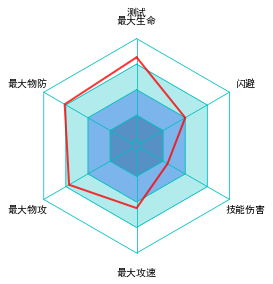

In [8]:
#手动用极坐标来画出六边形，然后得出雷达图
import numpy as np
import matplotlib.pyplot as plt



def plot_radar(data, name):
    sum=0
    for i in range(0,7):
        data[i]*=2
    criterion = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] # 基准雷达图
    criterion_2 = [1, 1, 1, 1, 1, 1 , 1] # 基准雷达图
    criterion_3 = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5] # 基准雷达图
    angles = np.linspace(0, 2 * np.pi, 6, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
   
    fig = plt.figure(facecolor='#FFFFFF') # 创建画板并填充颜色
    ax = fig.add_subplot(111, polar=True,)  # 设置坐标为极坐标
    # 绘制三个五边形
    floor = 0
    ceil = 2
    labels = np.array(['最大生命', '最大物防', '最大物攻', '最大攻速','技能伤害','闪避'])
    # 绘制五边形的循环
    for i in np.arange(floor, ceil + 0.5 ,0.5):
        ax.plot(angles, [i] * (7), '-', lw= 0.8, color='c')
    for i in range(6):
        ax.plot([angles[i], angles[i]], [floor, ceil], '-',lw=0.8, color='c')
     # 绘制雷达图
    ax.plot(angles, criterion, 'c', lw=0.5, alpha=0.35)
    ax.fill(angles, criterion, facecolor='k', alpha=0.3) #填充
    ax.plot(angles, criterion_2, 'c', lw=0.5, alpha=0.35)
    ax.fill(angles, criterion_2, facecolor='b', alpha=0.3) #填充
    ax.plot(angles, criterion_3, 'c', lw=0.5, alpha=0.35)
    ax.fill(angles, criterion_3, facecolor='c', alpha=0.3) #填充
    
    ax.plot(angles, data, 'r-', lw=2, alpha=0.8)
    #ax.fill(angles, data, facecolor='b', alpha=0.25)

    ax.set_thetagrids(angles * 180 / np.pi, labels, fontproperties="SimHei")
    ax.spines['polar'].set_visible(False)#不显示极坐标最外的圆形
    ax.set_theta_zero_location('N')#设置极坐标的起点（即0度）在正上方向
    ax.grid(False)# 不显示分隔线
    ax.set_yticks([]) # 不显示坐标间隔
    ax.set_title(name, va='bottom', fontproperties='SimHei')
    ax.set_facecolor('#FFFFFF') # 填充绘图区域的颜色
    # 保存文png图片
    plt.subplots_adjust(left=0.09, right=1, wspace=0.25, hspace=0.25, bottom=0.13, top=0.91)
    #plt.show()
    
    attr = './测试/'+name+'.png'
    plt.savefig(attr)
    
    
def radar_graph(a,b,c,d,e,f,g):
    max_life=a
    max_defence=b
    max_attack=c
    max_attack_speed=d
    skill_attack=e
    flexibility=f
    name=g
    print(g)

    data = [max_life/9000, max_defence/520 , max_attack/450,max_attack_speed/0.5, skill_attack/200, flexibility/10, max_life/9000]

    plot_radar(data,name)
    
    
radar_graph(7350,397,321,0.28,60,5,"测试")


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


后羿
鲁班七号
孙尚香
黄忠
狄仁杰
虞姬
成吉思汗


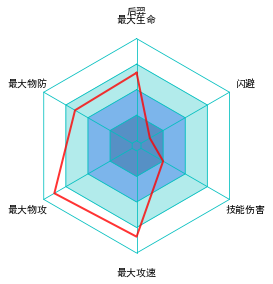

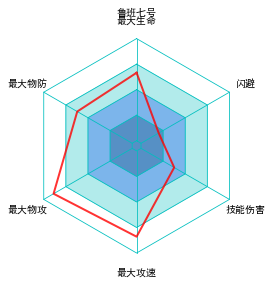

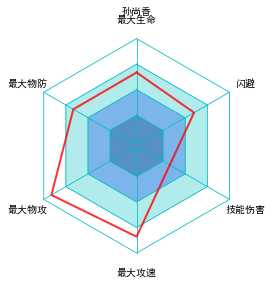

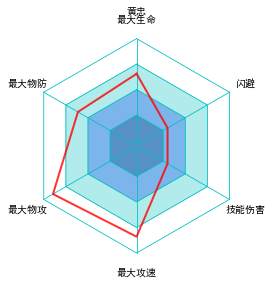

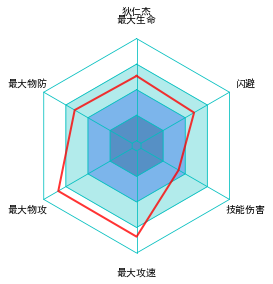

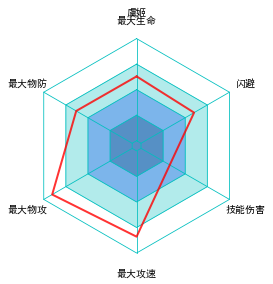

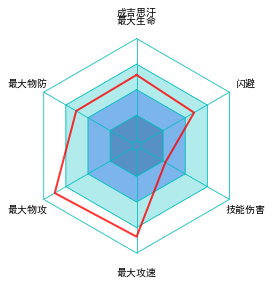

In [9]:
# -*- coding: utf-8 -*-
#该代码，运行起来需要10次，每一次都需要修改存储路径，我已经把类别分好了，大家可以查看分类图片中
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler



data_ori = pd.read_csv('./hero_out_3.csv', encoding = 'gb18030')
features = ['英雄','分组','最大生命', '最大物防', '最高物攻', '最大攻速','技能伤害','灵活性']
data = data_ori[features]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)



for i in range(0,69):
    if (data['分组'][i] == 0):
        radar_graph(data['最大生命'][i],data['最大物防'][i],data['最高物攻'][i],data['最大攻速'][i],data['技能伤害'][i],data['灵活性'][i],data['英雄'][i])
        

我们可以看出，同一组的英雄 ，他们的雷达图都是类似的

#6.为了更加直观看出不同英雄之间的优势劣汰，我们可以进行二维图/三维图展示

但是在此之前要从新量化标准

由于所有重新的量化都是我自己写的，为了突出一些特征，还做了缩减与放大，但是量化标准并不唯一

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding = 'gb18030')
features = [u'英雄',u'最大生命',u'最大物防',u'最高物攻',u'最大法力',u'最大攻速', u'攻击范围',u'技能伤害',u'技能控制',u'灵活性',u'吸血回血能力',u'主要定位']
data = data_ori[features]


# 相关性大的属性保留一个，因此可以对属性进行降维
#features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})

In [ ]:
#攻击属性 是按照 技能伤害和普通攻击伤害（已考虑攻速加成） 1:1衡量
data[u'攻击属性'] = data[u'技能伤害']
data[u'攻击属性'] = data[u'攻击属性'].apply(lambda x: x/4)
print(data[u'攻击属性'])
data[u'攻击属性'] = data[u'攻击属性'] + data[u'最高物攻']*data[u'最大攻速']/4
print(data[u'攻击属性'])
data[u'攻击属性'] = data[u'攻击属性']/70*100

In [ ]:
#防御属性是按照 最大生命值、物理防御、吸血 3:3:2的比例衡量
data[u'防御属性'] = data[u'最大生命']/9500
print(data[u'防御属性'])
data[u'防御属性'] = data[u'防御属性'] + data[u'最大物防']/550
print(data[u'防御属性'])
data[u'防御属性'] = data[u'防御属性'] + data[u'吸血回血能力']/15
data[u'防御属性'] = data[u'防御属性']*100/3
print(data[u'防御属性'])
data[u'防御属性'] = (data[u'防御属性']-35)/50*100

In [ ]:
data.to_csv('./hero_new_1.csv', index=False, sep=',',encoding = 'gb18030')

#7.二维图展示

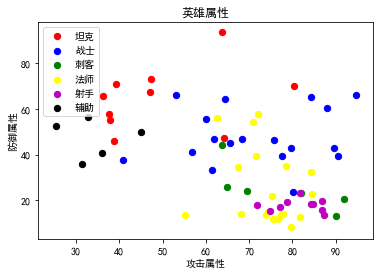

In [10]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler




def two_dimension(str_1,str_2,str_3):

    # 数据加载，避免中文乱码问题
    data_ori = pd.read_csv('./hero_new_1.csv', encoding = 'gb18030')
    features = [str_1, str_2, str_3]
    data = data_ori[features]



    x1=list()
    y1=list()
    x2=list()
    y2=list()
    x3=list()
    y3=list()
    x4=list()
    y4=list()
    x5=list()
    y5=list()
    x6=list()
    y6=list()

    for i in range(0,69):
        if (data[str_3][i] == "坦克"):
            x1.append(data[str_1][i])
            y1.append(data[str_2][i])
        elif data[str_3][i] == "战士":
            x2.append(data[str_1][i])
            y2.append(data[str_2][i])
        elif data[str_3][i] == "刺客":
            x3.append(data[str_1][i])
            y3.append(data[str_2][i])
        elif data[str_3][i] == "法师":
            x4.append(data[str_1][i])
            y4.append(data[str_2][i])
        elif data[str_3][i] == "射手":
            x5.append(data[str_1][i])
            y5.append(data[str_2][i])
        elif data[str_3][i] == "辅助":
            x6.append(data[str_1][i])
            y6.append(data[str_2][i])



    plt.scatter(x1, y1, marker = 'o',color = 'red', s = 40 ,label = '坦克')
    plt.scatter(x2, y2, marker = 'o', color = 'blue', s = 40, label = '战士')
    plt.scatter(x3, y3, marker = 'o', color = 'green', s = 40, label = '刺客')
    plt.scatter(x4, y4, marker = 'o', color = 'yellow', s = 40, label = '法师')
    plt.scatter(x5, y5, marker = 'o', color = 'm', s = 40, label = '射手')
    plt.scatter(x6, y6, marker = 'o', color = 'black', s = 40, label = '辅助')
    plt.legend(loc = 'best')    # 设置 图例所在的位置 使用推荐位置
    
    plt.title('英雄属性')
    plt.xlabel('攻击属性')
    plt.ylabel('防御属性')
    plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
    
    plt.savefig('two_dimension.png')
    plt.show()  
    
    

#             x轴               y轴               分类标准
two_dimension(str_1=u'攻击属性',str_2=u'防御属性',str_3=u'主要定位')

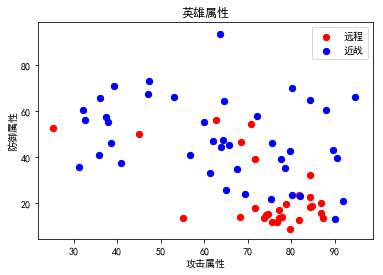

In [11]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler




def two_dimension(str_1,str_2,str_3):

    # 数据加载，避免中文乱码问题
    data_ori = pd.read_csv('./hero_new_1.csv', encoding = 'gb18030')
    features = [str_1, str_2, str_3]
    data = data_ori[features]



    x1=list()
    y1=list()
    x2=list()
    y2=list()
    

    for i in range(0,69):
        if (data[str_3][i] == 1):
            x1.append(data[str_1][i])
            y1.append(data[str_2][i])
        elif data[str_3][i] == 0:
            x2.append(data[str_1][i])
            y2.append(data[str_2][i])
        



    plt.scatter(x1, y1, marker = 'o',color = 'red', s = 40 ,label = '远程')
    plt.scatter(x2, y2, marker = 'o', color = 'blue', s = 40, label = '近战')
   
    plt.legend(loc = 'best')    # 设置 图例所在的位置 使用推荐位置
    
    plt.title('英雄属性')
    plt.xlabel('攻击属性')
    plt.ylabel('防御属性')
    plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签

    plt.savefig('two_dimension_2.png')
    plt.show()  
    
    
    

#             x轴               y轴               分类标准
two_dimension(str_1=u'攻击属性',str_2=u'防御属性',str_3=u'攻击范围')

#8.三维图展示

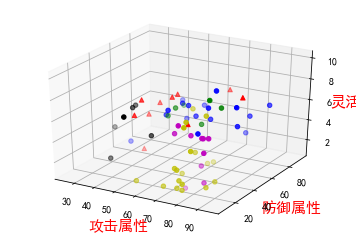

In [12]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
##画个简单三维图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def three_dimension(str_1,str_2,str_3,str_4):

    # 数据加载，避免中文乱码问题
    data_ori = pd.read_csv('./hero_new_1.csv', encoding = 'gb18030')
    features = [str_1, str_2, str_3,str_4]
    data = data_ori[features]


    ax = plt.figure().add_subplot(111, projection = '3d')
    #基于ax变量绘制三维图
    xs_1=list()
    ys_1=list()
    zs_1=list()
    xs_2=list()
    ys_2=list()
    zs_2=list()
    xs_3=list()
    ys_3=list()
    zs_3=list()
    xs_4=list()
    ys_4=list()
    zs_4=list()
    xs_5=list()
    ys_5=list()
    zs_5=list()
    xs_6=list()
    ys_6=list()
    zs_6=list()

    for i in range(0,69):
        if (data[str_4][i] == "坦克"):
            xs_1.append(data[str_1][i])
            ys_1.append(data[str_2][i])
            zs_1.append(data[str_3][i])
        elif data[str_4][i] == "战士":
            xs_2.append(data[str_1][i])
            ys_2.append(data[str_2][i])
            zs_2.append(data[str_3][i])
        elif data[str_4][i] == "刺客":
            xs_3.append(data[str_1][i])
            ys_3.append(data[str_2][i])
            zs_3.append(data[str_3][i])
        elif data[str_4][i] == "法师":
            xs_4.append(data[str_1][i])
            ys_4.append(data[str_2][i])
            zs_4.append(data[str_3][i])
        elif data[str_4][i] == "射手":
            xs_5.append(data[str_1][i])
            ys_5.append(data[str_2][i])
            zs_5.append(data[str_3][i])
        elif data[str_4][i] == "辅助":
            xs_6.append(data[str_1][i])
            ys_6.append(data[str_2][i])
            zs_6.append(data[str_3][i])

    #xs表示x方向的变量
    #ys表示y方向的变量
    #zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示
    #m表示点的形式，o是圆形的点，^是三角形（marker)
    #c表示颜色（color for short）
    ax.scatter(xs_1, ys_1, zs_1, c = 'r', marker = '^',label = '坦克') 
    ax.scatter(xs_2, ys_2, zs_2, c = 'b', marker = 'o',label = '战士') 
    ax.scatter(xs_3, ys_3, zs_3, c = 'g', marker = 'o',label = '刺客') 
    ax.scatter(xs_4, ys_4, zs_4, c = 'y', marker = 'o',label = '法师') 
    ax.scatter(xs_5, ys_5, zs_5, c = 'm', marker = 'o',label = '射手') 
    ax.scatter(xs_6, ys_6, zs_6, c = 'k', marker = 'o',label = '辅助') 

    #设置坐标轴
    ax.set_xlabel('攻击属性',fontdict={'size': 15, 'color': 'red'})
    ax.set_ylabel('防御属性',fontdict={'size': 15, 'color': 'red'})
    ax.set_zlabel('灵活性',fontdict={'size': 15, 'color': 'red'})
    
    plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
    plt.savefig('three_dimension.png')

    #显示图像
    plt.show()


three_dimension(str_1=u'攻击属性',str_2=u'防御属性',str_3=u'灵活性', str_4=u'主要定位')

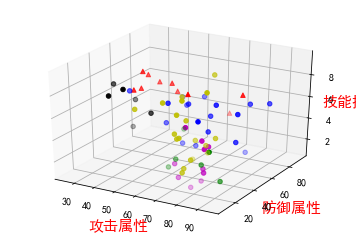

In [14]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
##画个简单三维图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def three_dimension(str_1,str_2,str_3,str_4):

    # 数据加载，避免中文乱码问题
    data_ori = pd.read_csv('./hero_new_1.csv', encoding = 'gb18030')
    features = [str_1, str_2, str_3,str_4]
    data = data_ori[features]


    ax = plt.figure().add_subplot(111, projection = '3d')
    #基于ax变量绘制三维图
    xs_1=list()
    ys_1=list()
    zs_1=list()
    xs_2=list()
    ys_2=list()
    zs_2=list()
    xs_3=list()
    ys_3=list()
    zs_3=list()
    xs_4=list()
    ys_4=list()
    zs_4=list()
    xs_5=list()
    ys_5=list()
    zs_5=list()
    xs_6=list()
    ys_6=list()
    zs_6=list()

    for i in range(0,69):
        if (data[str_4][i] == "坦克"):
            xs_1.append(data[str_1][i])
            ys_1.append(data[str_2][i])
            zs_1.append(data[str_3][i])
        elif data[str_4][i] == "战士":
            xs_2.append(data[str_1][i])
            ys_2.append(data[str_2][i])
            zs_2.append(data[str_3][i])
        elif data[str_4][i] == "刺客":
            xs_3.append(data[str_1][i])
            ys_3.append(data[str_2][i])
            zs_3.append(data[str_3][i])
        elif data[str_4][i] == "法师":
            xs_4.append(data[str_1][i])
            ys_4.append(data[str_2][i])
            zs_4.append(data[str_3][i])
        elif data[str_4][i] == "射手":
            xs_5.append(data[str_1][i])
            ys_5.append(data[str_2][i])
            zs_5.append(data[str_3][i])
        elif data[str_4][i] == "辅助":
            xs_6.append(data[str_1][i])
            ys_6.append(data[str_2][i])
            zs_6.append(data[str_3][i])

    #xs表示x方向的变量
    #ys表示y方向的变量
    #zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示
    #m表示点的形式，o是圆形的点，^是三角形（marker)
    #c表示颜色（color for short）
    ax.scatter(xs_1, ys_1, zs_1, c = 'r', marker = '^',label = '坦克') 
    ax.scatter(xs_2, ys_2, zs_2, c = 'b', marker = 'o',label = '战士') 
    ax.scatter(xs_3, ys_3, zs_3, c = 'g', marker = 'o',label = '刺客') 
    ax.scatter(xs_4, ys_4, zs_4, c = 'y', marker = 'o',label = '法师') 
    ax.scatter(xs_5, ys_5, zs_5, c = 'm', marker = 'o',label = '射手') 
    ax.scatter(xs_6, ys_6, zs_6, c = 'k', marker = 'o',label = '辅助') 

    #设置坐标轴
    ax.set_xlabel('攻击属性',fontdict={'size': 15, 'color': 'red'})
    ax.set_ylabel('防御属性',fontdict={'size': 15, 'color': 'red'})
    ax.set_zlabel('技能控制',fontdict={'size': 15, 'color': 'red'})
    
    plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
    plt.savefig('three_dimension_2.png')

    #显示图像
    plt.show()


three_dimension(str_1=u'攻击属性',str_2=u'防御属性',str_3=u'技能控制', str_4=u'主要定位')